# Journal Entry Test

This is a template jupyter notebook to perform journal entry tests upon request of the financial audit team. 

## Instructions

First of all, you need to create a virtual environment for python using the `venv` module. To do so, open a command prompt and run the following command:

```bash
python.exe -m venv venv
```

Once the virtual environment is created, you need to activate it. To do so, run the following command:

```bash
\venv\scripts\activate.bat
```

Once the virtual environment is activated, you need to install the dependencies. To do so, run the following command:

```bash
pip install -r requirements.txt
```

Once the dependencies are installed, you can download the journal entry test template from the [JET repository](https://github.com/tlex-web/journal-entry-tests.git) and save it to your local machine. To do so, run the following command:

```bash
git clone https://github.com/tlex-web/journal-entry-tests.git
```

You can now run the notebook. To do so, run the following command:

```bash
jupyter-lab
```

Once the notebook is running, you can open the notebook by clicking on the `JET.ipynb` file in the file browser.

**_or_** 

You can also open and run the notebook directly in Visual Studio Code. To do so, open the `JET.ipynb` file in Visual Studio Code and click on the `Run Cell` button in the top right corner of the notebook.


## Input

The following information is required to run the journal entry test:

* **Journal Entry Test Date**: The date the journal entry test was performed.
* **Journal Entry Test Performed By**: The name of the person who performed the journal entry test.
* **Journal Entry Test Reviewed By**: The name of the person who reviewed the journal entry test.
* **Journal Entry Test Reviewed Date**: The date the journal entry test was reviewed.
* **General Ledger**: The general ledger of the company.
* **Trial Balance**: The trial balance of the company.

The `General Ledger` and `Trial Balance` files must be in CSV format. The `General Ledger` file must at least contain the following columns:

* **Account**: The account number.
* **Account Description**: The account description.
* **Debit**: The debit amount.
* **Credit**: The credit amount.
* **Date**: The date of the transaction.
* **Journal Entry**: The journal entry number.
* **Journal Entry Description**: The journal entry description.

The `Trial Balance` file must at least contain the following columns:

* **Account**: The account number.
* **Account Description**: The account description.
* **Debit**: The debit amount.
* **Credit**: The credit amount.

The `General Ledger` and `Trial Balance` files must be saved in the `data` folder. The `General Ledger` file must be named `general_ledger.csv` and the `Trial Balance` file must be named `trial_balance.csv`.

## Output

The notebook is designed to automatically generate the following file structure:

```
.
├── JET.ipynb
├── JET.pdf
├── JET.html
├── /data/
    ├── /data/general__ledger.csv
    ├── /data/trial_balance.csv
    ├── /data/data.csv
├── /helpers/helpers.py
└── /results/
    ├── /JB0/results.xlsx | no_result.txt
    ├── /JB1/results.xlsx | no_result.txt
    ├── /JB2/results.xlsx | no_result.txt
    ├── /JB3/results.xlsx | no_result.txt
    ├── /JB4/results.xlsx | no_result.txt
    ├── /JB5/results.xlsx | no_result.txt
    ├── /JB6/results.xlsx | no_result.txt
    ├── /JB7/results.xlsx | no_result.txt
    ├── /JB8/results.xlsx | no_result.txt
    ├── /JB9/results.xlsx | no_result.txt
    └── /JB10/results.xlsx | no_result.txt
``` 

The `JET.ipynb` notebook is the template notebook that you downloaded from the JET repository. The `JET.pdf` and `JET.html` files are copies of the notebook in PDF and HTML format. The `data` folder contains the data used to perform the journal entry test. The `results` folder contains the results of the journal entry test. The results are stored in Excel format. If no results are found for a journal entry test, a `no_result.txt` file is created in the corresponding journal entry test folder. The `helpers.py` file contains the helper functions used to perform the journal entry test.

## Dependencies

The following dependencies are required to run the journal entry test:

* [Python 3.10](https://www.python.org/downloads/release/python-310/)
* [Jupyter Notebook latests release](https://jupyter.org/)
* [Pandas latests release](https://pandas.pydata.org/)
* [Numpy latests release](http://www.numpy.org/)
* [Matplotlib latests release](https://matplotlib.org/)
* [Seaborn latests release](https://seaborn.pydata.org/)
* [XlsxWriter latests release](https://xlsxwriter.readthedocs.io/)

Please note that the notebook is designed to automatically install the required dependencies if they are not already installed on your machine. In case the automatic installation fails, please install the dependencies manually using the `pip install` command to install the dependencies listed in the `requirements.txt` lock file.

## Import and Sanitization

In [37]:
# load required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import seaborn as sns
import missingno as msno

import os
import json

In [38]:
# load internal libraries
from helpers.helpers import get_holidays

In [64]:
# create results folder and all subfolders for the JET tests if they do not yet exists
if not os.path.exists('results'):
    os.makedirs('results')

for i in range(0, 11):
    if not os.path.exists('results/JB' + str(i)):
        os.makedirs('results/JB' + str(i))

In [39]:
# constants
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [40]:
# global variables
jet_execution_date = '2021-12-31'
jet_execution_person = 'John Doe'
jet_execution_review_date = '2022-01-01'
jet_execution_reviewer = 'Jane Doe'

# notebook variables
relative_path = './data/'
filename_gl = relative_path + 'general_ledger.csv' # Please update if you want to use a different file
filename_tb = relative_path + 'trial_balance.csv' # Please update if you want to use a different file

Please remember to change the text encoding to `UTF-8` when importing the `General Ledger` and `Trial Balance` files. This is to ensure that the files are imported correctly. 
You can do so by opening the files in a text editor such as [Notepad++](https://notepad-plus-plus.org/downloads/) or the [Notepad](https://apps.microsoft.com/store/detail/windows-notepad/9MSMLRH6LZF3) and changing the encoding to `UTF-8` in the `Encoding` menu while saving the files.

In [41]:
# data import 
# set the appropriate decimal and separator characters
df_gl = pd.read_csv(filename_gl, sep = ";", decimal = ",")
df_tb = pd.read_csv(filename_tb, sep = ";", decimal = ",")

# check if all columns are correctly imported and the floating point numbers are correctly interpreted
df_gl.head()

,Buch'nr.,Zeilenr.,Belegdat.,Belegnr.,Sollkto.,S'betrag EUR,S'betrag EUR.1,Habenkto.,H'betrag EUR,Buch'text,Währung
0,483476,1,01.01.2021,R02289401 2022,4360.0,51.86,51.86,NaN,NaN,lalux - Leudelange,EUR
1,483476,2,01.01.2021,R02289401 2022,NaN,NaN,NaN,72072.0,51.86,lalux - Leudelange,EUR
2,483476,3,01.01.2021,R02289401 2022,NaN,NaN,NaN,1600.0,51.86,lalux - Leudelange,EUR
3,483931,1,06.06.2021,3022100219105-01,4138.0,1533.08,1533.08,NaN,NaN,BG RCI - Heidelberg,EUR
4,483931,2,06.06.2021,3022100219105-01,NaN,NaN,NaN,71781.0,1533.08,BG RCI - Heidelberg,EUR


In [42]:
# check data types 
df_gl.dtypes, df_tb.dtypes

(Buch'nr.            int64
 Zeilenr.            int64
 Belegdat.          object
 Belegnr.           object
 Sollkto.          float64
 S'betrag EUR      float64
 S'betrag EUR.1    float64
 Habenkto.         float64
 H'betrag EUR      float64
 Buch'text          object
 Währung            object
 dtype: object,
 Nr.              int64
 Bezeichnung     object
 Soll           float64
 Haben          float64
 Soll2          float64
 Haben3         float64
 Soll4          float64
 Haben5         float64
 Soll6          float64
 Haben7         float64
 dtype: object)

In [43]:
# sanitize data 
# change column names and data types in place 
# do so for both dataframes and all columns that need to be changed

def sanitize_gl(df: pd.DataFrame) -> pd.DataFrame:

    # lowercase column names
    df.columns = df.columns.str.lower()

    # rename columns
    df = df.rename(columns={
    "buch'nr.": "booking_nr",
    "zeilenr.": "line_nr",
    "belegdat.": "document_date",
    "belegnr.": "document_nr",
    "betrag": "amount",
    "währung": "currency",
    "buch'text": "description",
    "sollkto.": "debit_account",
    "habenkto.": "credit_account",
    "s'betrag eur": "debit_amount",
    "h'betrag eur": "credit_amount",
    })

    # cast data types 

    # numbers 
    df["booking_nr"] = df["booking_nr"].astype("Int64") # remove the trailling commas
    df["booking_nr"] = df["booking_nr"].astype('category')
    
    # dates
    df["document_date"] = pd.to_datetime(df["document_date"], format="mixed", errors="coerce")

    # strings 
    df["document_date"] = df["document_date"].astype(str)
    df["description"] = df["description"].astype(str)
    df["currency"] = df["currency"].astype(str)

    # category
    df["credit_account"] = df["credit_account"].astype("Int64") # remove the trailling commas
    df["credit_account"] = df["credit_account"].astype("category")
    df["debit_account"] = df["debit_account"].astype("Int64")
    df["debit_account"] = df["debit_account"].astype("category")
    
    return df

def sanitize_tb(df: pd.DataFrame) -> pd.DataFrame:

    # lowercase column names
    df.columns = df.columns.str.lower()

    # rename columns
    df = df.rename(columns={
    "nr.": "kontonummer",
    "bezeichnung": "kontobezeichnung",
    "soll": "soll_ob",
    "haben": "haben_ob",
    "soll2": "soll_periode_13",
    "haben3": "haben_periode_13",
    "soll4": "soll_periode_12",
    "haben5": "haben_periode_12",
    "soll6": "soll_saldo",
    "haben7": "haben_saldo"})

    # cast data types 
    df["kontobezeichnung"] = df["kontobezeichnung"].astype(str)

    # category
    df["kontonummer"] = df["kontonummer"].astype("Int64") # remove the trailing commas
    df["kontonummer"] = df["kontonummer"].astype("category")
    
    
    return df


# change df in place
df_gl = sanitize_gl(df_gl)
df_tb = sanitize_tb(df_tb)

df_gl.dtypes, df_tb.dtypes

(booking_nr        category
 line_nr              int64
 document_date       object
 document_nr         object
 debit_account     category
 debit_amount       float64
 s'betrag eur.1     float64
 credit_account    category
 credit_amount      float64
 description         object
 currency            object
 dtype: object,
 kontonummer         category
 kontobezeichnung      object
 soll_ob              float64
 haben_ob             float64
 soll_periode_13      float64
 haben_periode_13     float64
 soll_periode_12      float64
 haben_periode_12     float64
 soll_saldo           float64
 haben_saldo          float64
 dtype: object)

In [44]:
# remove redundant information 
del df_gl["s'betrag eur.1"]

In [45]:
# in case you need to join the general ledger with the header file, please uncomment the following lines
# join the header file with the general ledger file to populate the GL with the missing information from the header file and keep all the information from the GL file

# df_gl_ = pd.merge(df_gl, df_header, on = "index", how = "outer", suffixes = ('_left', '_right'))

# df_gl_.to_excel('data/general_ledger_complete.xlsx', index=False, sheet_name='GL')

# len(df_gl), len(df_gl_), df_gl_.head()

In [46]:
# export column names as a dictionary to quickly access the column names
dict_columns_gl = dict(zip(df_gl.columns, range(len(df_gl.columns))))
dict_columns_tb = dict(zip(df_tb.columns, range(len(df_tb.columns))))

with open('dict_columns_gl.json', 'w') as fp:
    json.dump(dict_columns_gl, fp)

with open('dict_columns_tb.json', 'w') as fp:
    json.dump(dict_columns_tb, fp)

## Missing values

__investigate missing values__

check if there are any missing values in the dataframes and explain why they are missing

e.g. missing values in the general ledger file are due to the fact that the header file is missing information for the respective booking and the debit and credit amounts for each booking are stored in separate rows.

e.g. missing values in the trial balance file are due to the fact that the account is not used in the respective period

In [47]:
# Count Missing Values per Variable und in DataFrame überführen
y_count_mv = pd.DataFrame(df_gl.isnull().sum())
y_count_mv.columns = ['count']
y_count_mv.index.names = ['Name']
y_count_mv['Name'] = y_count_mv.index
y_count_mv = y_count_mv[y_count_mv['count'] != 0]
y_count_mv.sort_values(by=['count'], inplace=True, ascending=True)


missing_values = pd.DataFrame(y_count_mv['count'] / len(df_gl) * 100)
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values.sort_values(by=['count'], inplace=True, ascending=True)

x = y_count_mv['Name']

# Creating two subplots
fig = sp.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(go.Bar(
    x=missing_values['count'],
    y=x,
    marker=dict(
        color='rgba(18, 63, 90, 0.95)',
        line=dict(
            color='rgba(18, 63, 90, 1.0)',
            width=1),
    ),
    name='Relative amount of missing values (%)',
    orientation='h',
), 1, 1)

fig.append_trace(go.Scatter(
    x=y_count_mv['count'], y=x,
    mode='lines+markers',
    line_color='rgb(0, 68, 27)',
    name='Absolute values of missing values',
), 1, 2)

fig.update_layout(
    title='Absolute and relative amount of missing values per variable',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=False,
        showticklabels=False,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=2,
        domain=[0, 0.85],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.42],
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        dtick=2000,
    ),
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []

y_s = np.round(missing_values['count'], decimals=2)
y_nw = np.rint(y_count_mv['count'])

# add labels
for ydn, yd, xd in zip(y_nw, y_s, x):
    annotations.append(dict(xref='x2', yref='y2',
                            y=xd, x=ydn + 500 if ydn == max(y_nw) else ydn -500, # move the label to the left side if it is the maximum value
                            text='{:,}'.format(ydn),
                            font=dict(family='Arial', size=12,
                                      color='rgb(0, 68, 27)'),
                            showarrow=False))
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x=yd + 0.75,
                            text=str(yd) + '%',
                            font=dict(family='Arial', size=12,
                                      color='rgb(18, 63, 90)'),
                            showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

<Axes: >

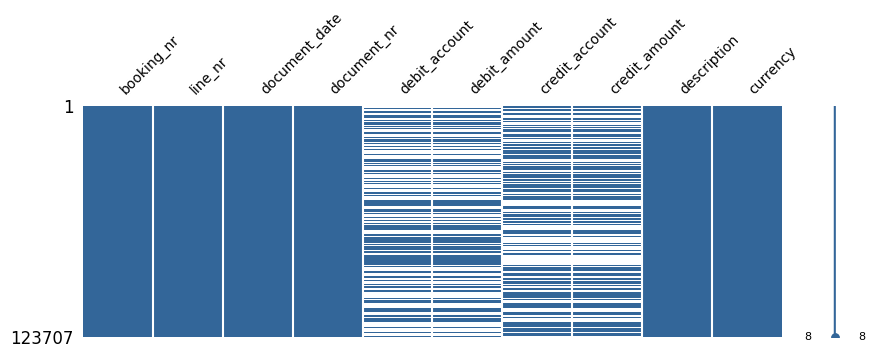

In [48]:
msno.matrix(df_gl, figsize=(10, 3), fontsize=10, color=(0.2, 0.4, 0.6))

<Axes: xlabel='Name', ylabel='Name'>

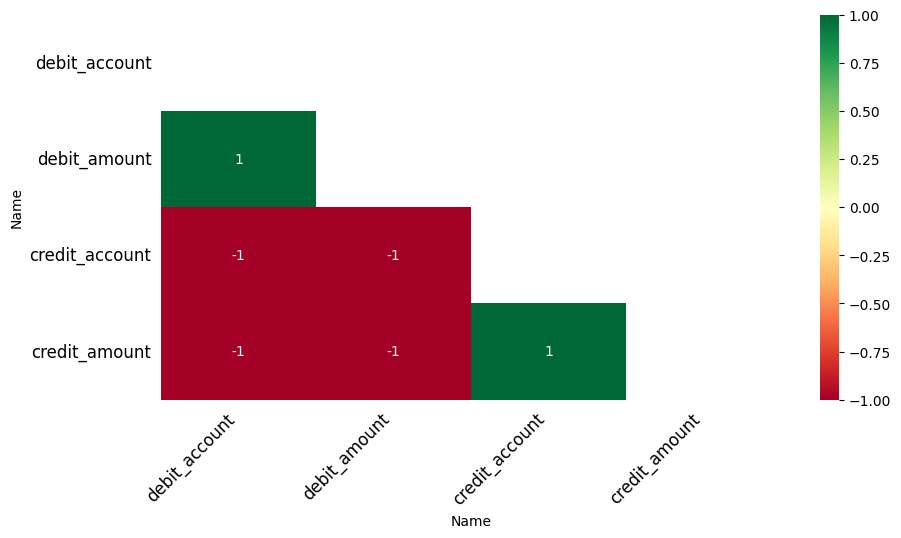

In [49]:
msno.heatmap(df_gl, figsize=(10, 5), fontsize=12, cmap="RdYlGn")

Since the debit and credit amounts for each booking are stored in separate rows, the debit account and amount is exactly negative correlated with the credit account and amount. So the presence of missing values can be explained. 

## JB 0: reconciliation of line item control totals

### Account numbers 

In [50]:
# check which accounts are used most often
df_debit_acc = round(df_gl["debit_account"].value_counts(normalize = True).to_frame(),2) 
df_credit_acc = round(df_gl["credit_account"].value_counts(normalize = True).to_frame(),2)

df_debit_acc.head(10), df_credit_acc.head(10)

(               proportion
 debit_account            
 1600                 0.14
 1400                 0.10
 8726                 0.07
 1563                 0.07
 1200                 0.06
 1763                 0.03
 1210                 0.03
 1581                 0.03
 3425                 0.02
 4983                 0.02,
                 proportion
 credit_account            
 1600                  0.14
 1400                  0.14
 8125                  0.09
 1210                  0.08
 1763                  0.06
 1200                  0.05
 1563                  0.03
 3725                  0.03
 1762                  0.02
 1220                  0.02)

There are 1342 debit accounts and 1222 credit accounts present in the GL.

In [51]:
# save indecies for all NAs to get the respective amounts 
index_debit_na = df_gl.index[pd.isna(df_gl["debit_account"]) == False]
index_credit_na = df_gl.index[pd.isna(df_gl["credit_account"]) == False]

amounts_debit = df_gl["debit_amount"].loc[index_debit_na].to_frame("debit_amount")
amounts_debit.insert(1, "debit_account", df_gl["debit_account"].loc[index_debit_na], True)
amounts_credit = df_gl["credit_amount"].loc[index_credit_na].to_frame("credit_amount")
amounts_credit.insert(1, "credit_account", df_gl["credit_account"].loc[index_credit_na], True)

# length equals the length of the original variable, so I assume there is no error here
amounts_debit = amounts_debit.groupby("debit_account")["debit_amount"].sum().to_frame()
amounts_credit = amounts_credit.groupby("credit_account")["credit_amount"].sum().to_frame()
amounts_debit = amounts_debit.reset_index()
amounts_credit = amounts_credit.reset_index()

In [52]:
# matching account numbers to compare their sums
#compare_amounts = df.index[(df["sollkonto"].astype("Int64") == df["habenkonto"].astype("Int64")) == True]

# crosscheck sums
amounts_debit["debit_amount"].sum(), amounts_credit["credit_amount"].sum()

(554834924.85, 552962013.6799998)

### Debit and Credit 

### Debit

In [53]:
gl_sum_debit = round(df_gl["debit_amount"].dropna().sum(), 2)
gl_sum_debit

554834924.85

In [54]:
tb_sum_debit = round(df_tb["soll_periode_12"].dropna().sum() + df_tb["soll_ob"].dropna().sum() + df_tb["soll_periode_13"].dropna().sum(), 2)
tb_sum_debit

456475611.45

### Credit

In [55]:
gl_sum_credit = df_gl["credit_amount"].dropna().sum()
gl_sum_credit

552962013.6800001

In [56]:
tb_sum_credit = round(df_tb["haben_periode_12"].dropna().sum() + df_tb["haben_ob"].dropna().sum() + df_tb["haben_periode_13"].dropna().sum(), 2)
tb_sum_credit

456475611.45

### Difference

In [57]:
gl_diff_debit_credit = gl_sum_debit - gl_sum_credit
gl_diff_debit_credit

1872911.169999957

In [58]:
tb_diff_debit_credit = tb_sum_debit - tb_sum_credit
tb_diff_debit_credit

0.0

In [65]:
# create report of the reconciliation
report = pd.DataFrame({"GL": [gl_sum_debit, gl_sum_credit, gl_diff_debit_credit], "TB": [tb_sum_debit, tb_sum_credit, tb_diff_debit_credit]}, index = ["Debit", "Credit", "Difference"])

report.to_excel('results/JB0/reconciliation_results.xlsx', sheet_name='report', index = True, header=True, float_format="%.2f", engine='xlsxwriter')

## JB 1: journal entries do not balance to zero

### Compare GL and TB

In [66]:
# merge the debit and credit sums 
df_gl_sums = pd.concat([amounts_debit, amounts_credit], ignore_index=True, sort=False)

print(df_gl.dtypes)
print(df_gl.dtypes)

#df_gl_sums.loc[df_gl_sums.index[df_gl_sums["habenkonto"] == 1400]]

Name
booking_nr        category
line_nr              int64
document_date       object
document_nr         object
debit_account     category
debit_amount       float64
credit_account    category
credit_amount      float64
description         object
currency            object
dtype: object
Name
booking_nr        category
line_nr              int64
document_date       object
document_nr         object
debit_account     category
debit_amount       float64
credit_account    category
credit_amount      float64
description         object
currency            object
dtype: object


In [25]:
#index_eql_acc = df_gl_sums.loc[df_gl_sums.index[df_gl_sums["sollkonto"] == df_tb["kontonummer"]]]

# get all true values
df_credit_gl_tb = df_gl_sums[df_gl_sums["habenkonto"].isin(df_tb["kontonummer"])]
df_debit_gl_tb = df_gl_sums[df_gl_sums["sollkonto"].isin(df_tb["kontonummer"])]

print(df_credit_gl_tb.shape, df_debit_gl_tb.shape)

(178, 4) (292, 4)


In [26]:
# compare the sums of the GL and the TB for each credit account and save the difference 

acc_with_diff_credit = []
sum_diff_credit = 0

for acc in df_credit_gl_tb["habenkonto"]:
    sum_gl = round(df_credit_gl_tb["hbetrag_eur"].loc[df_credit_gl_tb.index[df_credit_gl_tb["habenkonto"] == acc]].sum(), 2)
    sum_tb = round(df_tb["haben_periode_12"].loc[df_tb.index[df_tb["kontonummer"] == acc]].sum(), 2)
    if sum_gl != sum_tb:
        acc_with_diff_credit.append(acc)
        sum_diff_credit += sum_gl - sum_tb
        print(f"Account: {acc} GL: {sum_gl} TB: {sum_tb} {bcolors.FAIL}NOT OK{bcolors.ENDC}")
    else:
        print(f"Account: {acc} GL: {sum_gl} TB: {sum_tb} {bcolors.OKGREEN}OK{bcolors.ENDC}")

pd.DataFrame(acc_with_diff_credit).to_excel('../JB1/credit_diff_gl_tb.xlsx', sheet_name='GL vs TB' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')

Account: 23 GL: 14495.0 TB: 14495.0 OK
Account: 25 GL: 8159.2 TB: 8159.2 OK
Account: 26 GL: 26646.0 TB: 26646.0 OK
Account: 27 GL: 1231.25 TB: 1231.25 OK
Account: 30 GL: 24000.0 TB: 24000.0 OK
Account: 35 GL: 60000.0 TB: 60000.0 OK
Account: 85 GL: 10649.0 TB: 10649.0 OK
Account: 175 GL: 23203.13 TB: 23203.13 OK
Account: 180 GL: 39200.0 TB: 39200.0 OK
Account: 187 GL: 46977.0 TB: 46977.0 OK
Account: 188 GL: 91790.0 TB: 91790.0 OK
Account: 190 GL: 50143.0 TB: 50143.0 OK
Account: 191 GL: 68655.0 TB: 68655.0 OK
Account: 215 GL: 16412.79 TB: 16412.79 OK
Account: 216 GL: 75308.88 TB: 75308.88 OK
Account: 284 GL: 133278.0 TB: 133278.0 OK
Account: 325 GL: 84941.35 TB: 84941.35 OK
Account: 380 GL: 9273.99 TB: 9273.99 OK
Account: 385 GL: 6535.0 TB: 6535.0 OK
Account: 400 GL: 62119.9 TB: 62119.9 OK
Account: 403 GL: 61806.49 TB: 61806.49 OK
Account: 405 GL: 676088.57 TB: 676088.57 OK
Account: 408 GL: 4329.0 TB: 4329.0 OK
Account: 411 GL: 59944.9 TB: 59944.9 OK
Account: 414 GL: 8125.0 TB: 8125.0 OK

In [27]:
# compare the sums of the GL and the TB for each debit account and save the difference

acc_with_diff_debit = []
sum_diff_debit = 0

for acc in df_debit_gl_tb["sollkonto"]:
    sum_gl = round(df_debit_gl_tb["sbetrag_eur"].loc[df_debit_gl_tb.index[df_debit_gl_tb["sollkonto"] == acc]].sum(), 2)
    sum_tb = round(df_tb["soll_periode_12"].loc[df_tb.index[df_tb["kontonummer"] == acc]].sum(), 2)
    if sum_gl != sum_tb:
        acc_with_diff_debit.append(acc)
        sum_diff_debit += sum_gl - sum_tb
        print(f"Account: {acc} GL: {sum_gl} TB: {sum_tb} {bcolors.FAIL}NOT OK{bcolors.ENDC}")
    else:
        print(f"Account: {acc} GL: {sum_gl} TB: {sum_tb} {bcolors.OKGREEN}OK{bcolors.ENDC}")

pd.DataFrame(acc_with_diff_debit).to_excel('../JB1/debit_diff_gl_tb.xlsx', sheet_name='GL vs TB' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')

Account: 22 GL: 14495.0 TB: 14495.0 OK
Account: 23 GL: 22620.0 TB: 22620.0 OK
Account: 25 GL: 8159.2 TB: 8159.2 OK
Account: 26 GL: 8125.0 TB: 8125.0 OK
Account: 27 GL: 61176.15 TB: 61176.15 OK
Account: 176 GL: 20737.13 TB: 20737.13 OK
Account: 180 GL: 39200.0 TB: 39200.0 OK
Account: 210 GL: 54051.7 TB: 54051.7 OK
Account: 280 GL: 206000.0 TB: 206000.0 OK
Account: 291 GL: 245721.14 TB: 245721.14 OK
Account: 320 GL: 4627.35 TB: 4627.35 OK
Account: 354 GL: 10000.0 TB: 10000.0 OK
Account: 381 GL: 24500.0 TB: 24500.0 OK
Account: 384 GL: 5725.0 TB: 5725.0 OK
Account: 400 GL: 91896.33 TB: 91896.33 OK
Account: 403 GL: 745421.87 TB: 745421.87 OK
Account: 408 GL: 4329.0 TB: 4329.0 OK
Account: 411 GL: 319108.38 TB: 319108.38 OK
Account: 412 GL: 10490.55 TB: 10490.55 OK
Account: 414 GL: 8125.0 TB: 8125.0 OK
Account: 415 GL: 13289.58 TB: 13289.58 OK
Account: 416 GL: 4329.0 TB: 4329.0 OK
Account: 423 GL: 32177.85 TB: 32177.85 OK
Account: 480 GL: 4276.8 TB: 4276.8 OK
Account: 483 GL: 43838.79 TB: 438

0 0


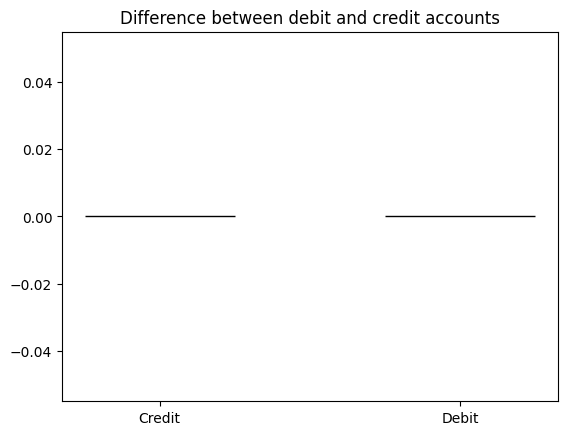

In [28]:
# the difference between the sum of debit and credit accounts in the GL and the TB is identical and therefore balanced between the GL and the TB

print(np.abs(sum_diff_debit), np.abs(sum_diff_credit))

plt.bar(x=["Credit", "Debit"], height=[np.abs(sum_diff_credit), np.abs(sum_diff_debit)], color=["black", "gray"], width=0.5, align="center", edgecolor="black")
plt.title("Difference between debit and credit accounts")
plt.show()

### Compare all accounts in the GL

In [29]:
# investigate the difference between the sum of debit and credit accounts for each account in the GL as debit - credit

#df_gl_diff = df_gl_sums.loc[df_gl_sums.index[df_gl_sums["sollkonto"].astype(str) == df_gl_sums["habenkonto"].astype(str)]]["sollbetrag_eur"] == df_gl_sums.loc[df_gl_sums.index[df_gl_sums["sollkonto"].astype(str) == df_gl_sums["habenkonto"].astype(str)]]["habenbetrag_eur"]
#df_gl_sums["diff"] = df_gl_sums["diff"].fillna(0)
#df_gl_sums["diff"] = df_gl_sums["diff"].astype(int)
#df_gl_sums = df_gl_sums.sort_values(by=["diff"], ascending=False)
#df_gl_diff

In [30]:
gl_acc = []
gl_acc_diff = []
df_gl_acc_diff = pd.DataFrame()


for acc in df_gl_sums["sollkonto"]:
    sum_debit = round(df_gl_sums["sbetrag_eur"].loc[df_gl_sums.index[df_gl_sums["sollkonto"] == acc]].sum(), 2)
    sum_credit = round(df_gl_sums["hbetrag_eur"].loc[df_gl_sums.index[df_gl_sums["habenkonto"] == acc]].sum(), 2)
    diff = sum_debit - sum_credit
    gl_acc.append(acc)
    gl_acc_diff.append(diff)
    if diff != 0:
        print(f"Account: {acc} Debit: {sum_debit} Credit: {sum_credit} {bcolors.FAIL} Diff: {diff}{bcolors.ENDC}")

df_gl_acc_diff["konto"] = gl_acc
df_gl_acc_diff["debit"] = [round(df_gl_sums["sbetrag_eur"].loc[df_gl_sums.index[df_gl_sums["sollkonto"] == acc]].sum(), 2) for acc in gl_acc]
df_gl_acc_diff["credit"] = [round(df_gl_sums["hbetrag_eur"].loc[df_gl_sums.index[df_gl_sums["habenkonto"] == acc]].sum(), 2) for acc in gl_acc]
df_gl_acc_diff["diff"] = gl_acc_diff


df_gl_acc_diff = df_gl_acc_diff.drop(df_gl_acc_diff[(df_gl_acc_diff["konto"].isna()) | (df_gl_acc_diff["diff"] == 0)].index).reset_index(drop=True)

if df_gl_acc_diff.empty == False:
    df_gl_acc_diff.to_excel('../JB1/gl_acc_diff.xlsx', sheet_name='GL acc difference' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')
else:
    with open('../JB1/no_gl_acc_diff.txt', 'w') as f:
        f.write('No difference between debit and credit accounts in the GL')

Account: 22 Debit: 14495.0 Credit: 0.0  Diff: 14495.0
Account: 23 Debit: 22620.0 Credit: 14495.0  Diff: 8125.0
Account: 26 Debit: 8125.0 Credit: 26646.0  Diff: -18521.0
Account: 27 Debit: 61176.15 Credit: 1231.25  Diff: 59944.9
Account: 176 Debit: 20737.13 Credit: 0.0  Diff: 20737.13
Account: 210 Debit: 54051.7 Credit: 0.0  Diff: 54051.7
Account: 280 Debit: 206000.0 Credit: 0.0  Diff: 206000.0
Account: 291 Debit: 245721.14 Credit: 0.0  Diff: 245721.14
Account: 320 Debit: 4627.35 Credit: 0.0  Diff: 4627.35
Account: 354 Debit: 10000.0 Credit: 0.0  Diff: 10000.0
Account: 381 Debit: 24500.0 Credit: 0.0  Diff: 24500.0
Account: 384 Debit: 5725.0 Credit: 0.0  Diff: 5725.0
Account: 400 Debit: 91896.33 Credit: 62119.9  Diff: 29776.43
Account: 403 Debit: 745421.87 Credit: 61806.49  Diff: 683615.38
Account: 411 Debit: 319108.38 Credit: 59944.9  Diff: 259163.48
Account: 412 Debit: 10490.55 Credit: 0.0  Diff: 10490.55
Account: 415 Debit: 13289.58 Credit: 175102.59  Diff: -161813.01
Account: 416 Deb

In [31]:
# the difference for all accounts in the GL is ~19,089,361.26M EUR
# I cannot explain this difference and therefore I will not investigate it further

df_gl_acc_diff["diff"].sum()

19087149.740000013

### Compare all individual bookings in the GL

In [32]:
# prepare dataset with the booking number, account number, debit and credit amount

df_gl_acc_nr = df_gl_[["buchungsnr", "sollkonto", "sbetrag_eur", "habenkonto", "hbetrag_eur"]].copy().reset_index(drop=True)
df_gl_acc_nr["habenkonto"] = df_gl_acc_nr["habenkonto"].astype(str)
df_gl_acc_nr["sollkonto"] = df_gl_acc_nr["sollkonto"].astype(str)

print(f"Number of rows: {len(df_gl_acc_nr)}")
print(f"Number of unique booking numbers: {len(df_gl_acc_nr['buchungsnr'].unique())}")

df_gl_acc_nr.head()

Number of rows: 123708
Number of unique booking numbers: 39213


,buchungsnr,sollkonto,sbetrag_eur,habenkonto,hbetrag_eur
0,483476,4360,51.86,<NA>,NaN
1,483476,<NA>,NaN,72072,51.86
2,483476,<NA>,NaN,1600,51.86
3,483931,4138,1533.08,<NA>,NaN
4,483931,<NA>,NaN,71781,1533.08


In [33]:
# generate the sum of debit and credit amounts for each booking number
# the amount of unique booking numbers is identical to length of the dataset

df_gl_acc_nr_sums = df_gl_acc_nr.groupby(["buchungsnr"]).sum().reset_index()
df_gl_acc_nr_sums

,buchungsnr,sollkonto,sbetrag_eur,habenkonto,hbetrag_eur
0,483163,4988,196.00,725551600,392.00
1,483164,1563,33.32,1763,33.32
2,483168,3425,1936.26,706951600,3872.52
3,483169,1563,329.16,1763,329.16
4,483171,4983,416.00,722011600,832.00
...,...,...,...,...,...
39207,538494,4953,-6750.00,723241600,-13500.00
39208,538495,1562,-1147.50,1762,-1147.50
39209,538731,1536,4.51,2650,4.51
39210,538768,1536,6.68,2650,6.68


In [34]:
# get the sum of debit and credit amounts for each booking number 

df_gl_acc_nr_sums["diff"] = df_gl_acc_nr_sums["sbetrag_eur"] - df_gl_acc_nr_sums["hbetrag_eur"]
df_gl_acc_nr_sums = df_gl_acc_nr_sums.sort_values(by=["diff"], ascending=False).reset_index(drop=True)


print(f"Sum of the difference: {df_gl_acc_nr_sums['diff'].sum()}")
print(f"Number of booking numbers with difference: {len(df_gl_acc_nr_sums[df_gl_acc_nr_sums['diff'] != 0])}")
print(f"Amounts equal the overall difference: {round(df_gl_acc_nr_sums['diff'].sum(), 2) == round(gl_diff_debit_credit, 2)}")

df_gl_acc_nr_sums.to_excel('../JB1/sums_per_booking_nr.xlsx', sheet_name='Sums per booking number' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')

df_gl_acc_nr_sums

Sum of the difference: 1872911.169999987
Number of booking numbers with difference: 29166
Amounts equal the overall difference: True


,buchungsnr,sollkonto,sbetrag_eur,habenkonto,hbetrag_eur,diff
0,502979,299981476,2035626.02,2502,1017813.01,1017813.01
1,508897,299981476,2015558.76,2502,1007779.38,1007779.38
2,489814,299981476,1953102.06,2502,976551.03,976551.03
3,495762,299981476,1923330.38,2502,961665.19,961665.19
4,493141,299981476,1631947.94,2502,815973.97,815973.97
...,...,...,...,...,...,...
39207,493139,2501,815973.97,299981476,1631947.94,-815973.97
39208,495760,2501,961665.19,299981476,1923330.38,-961665.19
39209,489812,2501,976551.03,299981476,1953102.06,-976551.03
39210,508895,2501,1007779.38,299981476,2015558.76,-1007779.38


In [35]:
# exclude equal bookings with the same debit and credit amount

df_gl_acc_nr_sums_diff = df_gl_acc_nr_sums
df_gl_acc_nr_sums_diff["diff"] = df_gl_acc_nr_sums_diff["diff"].astype(int)
df_gl_acc_nr_sums_diff["diff"] = np.abs(df_gl_acc_nr_sums_diff["diff"])
df_gl_acc_nr_sums_diff = df_gl_acc_nr_sums_diff.sort_values(by=["diff"], ascending=False).reset_index(drop=True).drop_duplicates(subset=["diff"], keep="first").reset_index(drop=True)

# recalculate the difference to invert the creation of absolute values
df_gl_acc_nr_sums_diff["diff"] = df_gl_acc_nr_sums_diff["sbetrag_eur"] - df_gl_acc_nr_sums_diff["hbetrag_eur"]
df_gl_acc_nr_sums_diff = df_gl_acc_nr_sums_diff.sort_values(by=["diff"], ascending=False).reset_index(drop=True)


print(f"Sum of the difference: {round(df_gl_acc_nr_sums_diff['diff'].sum(),2)}")
print(f"Number of booking numbers with difference: {len(df_gl_acc_nr_sums_diff[df_gl_acc_nr_sums_diff['diff'] != 0])}")

df_gl_acc_nr_sums_diff.to_excel('../JB1/sums_per_booking_nr_diff.xlsx', sheet_name='Sums per booking number' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')

df_gl_acc_nr_sums_diff

Sum of the difference: 12424032.63
Number of booking numbers with difference: 8409


,buchungsnr,sollkonto,sbetrag_eur,habenkonto,hbetrag_eur,diff
0,502979,299981476,2035626.02,2502,1017813.01,1017813.01
1,489814,299981476,1953102.06,2502,976551.03,976551.03
2,493141,299981476,1631947.94,2502,815973.97,815973.97
3,499593,299981476,1613692.94,2502,806846.47,806846.47
4,512669,299981476,1518827.48,2502,759413.74,759413.74
...,...,...,...,...,...,...
8405,489502,1601,580796.43,599991400,1161592.86,-580796.43
8406,493522,12102150,746886.99,203461475203461475,1493773.98,-746886.99
8407,507384,2501,789678.37,299981476,1579356.74,-789678.37
8408,495760,2501,961665.19,299981476,1923330.38,-961665.19


### GL only with TB accounts

In [36]:
# extract all account numbers from the GL which are present in the TB

df_gl_tb_acc = df_gl.loc[df_gl_["sollkonto"].isin(df_tb["kontonummer"]) | df_gl_["habenkonto"].isin(df_tb["kontonummer"])]
df_gl_tb_acc = df_gl_tb_acc.reset_index(drop=True)

print(f"Number of rows: {len(df_gl_tb_acc)}")
print(f"Get relative number of rows: {round(len(df_gl_tb_acc) / len(df_gl) * 100, 2)} %")

df_gl_tb_acc.head(10)

Number of rows: 91158
Get relative number of rows: 73.69 %


,buchungsnr,zeilennr,belegdatum,belegnr,sollkonto,sbetrag_eur,sbetrag,habenkonto,hbetrag_eur,hbetrag,buchungstext,buchungsdatum,gjahr,periode,rel_periode,kennung,betrag_eur,betrag,waehrung,belegart
0,483476,1,2021-01-01,R02289401 2022,4360,51.86,51.86,NaN,NaN,NaN,lalux - Leudelange,10.01.2022,2022,1,1,KO,51.86,51.86,EUR,1
1,483476,3,2021-01-01,R02289401 2022,NaN,NaN,NaN,1600,51.86,51.86,lalux - Leudelange,10.01.2022,2022,1,1,DB,51.86,51.86,EUR,1
2,483931,1,2021-06-06,3022100219105-01,4138,1533.08,1533.08,NaN,NaN,NaN,BG RCI - Heidelberg,11.01.2022,2022,1,1,KO,1533.08,1533.08,EUR,1
3,483931,3,2021-06-06,3022100219105-01,NaN,NaN,NaN,1600,1533.08,1533.08,BG RCI - Heidelberg,11.01.2022,2022,1,1,DB,1533.08,1533.08,EUR,1
4,483993,1,2021-06-06,3022100219105-02,4138,1533.05,1533.05,NaN,NaN,NaN,BG RCI - Heidelberg,11.01.2022,2022,1,1,KO,1533.05,1533.05,EUR,1
5,483993,3,2021-06-06,3022100219105-02,NaN,NaN,NaN,1600,1533.05,1533.05,BG RCI - Heidelberg,11.01.2022,2022,1,1,DB,1533.05,1533.05,EUR,1
6,484553,1,2021-09-18,JSH210001-1195,3400,65963.28,74400.00,NaN,NaN,NaN,Sanhu - Nanjing (CN),13.01.2022,2022,1,1,KO,65963.28,74400.00,USD,1
7,484553,3,2021-09-18,JSH210001-1195,NaN,NaN,NaN,1600,65963.28,74400.00,Sanhu - Nanjing (CN),13.01.2022,2022,1,1,DB,65963.28,74400.00,USD,1
8,484554,1,2021-09-18,JSH210001-1195,1561,11213.76,12648.00,NaN,NaN,NaN,Sanhu - Nanjing (CN),13.01.2022,2022,1,1,EG,11213.76,12648.00,USD,1
9,484554,2,2021-09-18,JSH210001-1195,NaN,NaN,NaN,1761,11213.76,12648.00,Sanhu - Nanjing (CN),13.01.2022,2022,1,1,EG,11213.76,12648.00,USD,1


### Credit

In [37]:
gl_tb_acc_credit = round(df_gl_tb_acc["sbetrag_eur"].sum(), 2)

print(f"Sum of the GL: {gl_tb_acc_credit}")
print(f"Sum of is equal to the sum of the TB: {gl_tb_acc_credit == round(df_tb['soll_periode_12'].sum(), 2)}")

Sum of the GL: 401866597.23
Sum of is equal to the sum of the TB: True


### Debit

In [38]:
gl_tb_acc_debit = round(df_gl_tb_acc["hbetrag_eur"].sum(), 2)

print(f"Sum of the GL: {gl_tb_acc_debit}")
print(f"Sum is equal to the sum of the TB: {gl_tb_acc_debit == round(df_tb['haben_periode_12'].sum(), 2)}")

Sum of the GL: 401866597.23
Sum is equal to the sum of the TB: True


### Difference 

In [39]:
# the difference is equal to the difference of the sum 

print(f"Credit: {gl_tb_acc_credit} Debit: {gl_tb_acc_debit} Diff: {gl_tb_acc_debit - gl_tb_acc_credit}")
print(f"Credit {round((df_tb['haben_periode_12'].sum() - gl_tb_acc_credit), 2)} {df_tb['haben_periode_12'].sum() - gl_tb_acc_credit == sum_diff_credit}")
print(f"Debit {round((df_tb['soll_periode_12'].sum() - gl_tb_acc_debit), 2)} {df_tb['soll_periode_12'].sum() - gl_tb_acc_debit == sum_diff_credit}")

Credit: 401866597.23 Debit: 401866597.23 Diff: 0.0
Credit 0.0 True
Debit 0.0 False


In [40]:
# summarize the results of the reconciliation of the GL only with TB accounts

df_reconciliation_gl_tb_acc = pd.DataFrame({"GL": [gl_tb_acc_credit, gl_tb_acc_debit, gl_tb_acc_debit - gl_tb_acc_credit], "TB": [df_tb['soll_periode_12'].sum(), df_tb['haben_periode_12'].sum(), df_tb['haben_periode_12'].sum() - df_tb['soll_periode_12'].sum()]}, index=["Credit", "Debit", "Diff"])

df_reconciliation_gl_tb_acc.to_excel('../JB0/reconciliation_gl_tb_acc.xlsx', sheet_name='reconciliation w tb acc' ,index=True, header=True, float_format="%.2f", engine='xlsxwriter')

## JB 2: Number of transactions / preparer ID

### Total amounts per preparer ID

In [41]:
# get the total debit amount per preparer ID 

df_userid_totals = df_gl_.groupby(["benutzer"])
df_userid_totals = df_userid_totals[["sbetrag_eur", "hbetrag_eur"]].sum().reset_index()
df_userid_totals["diff"] = df_userid_totals["sbetrag_eur"] - df_userid_totals["hbetrag_eur"]
df_userid_totals = df_userid_totals.sort_values(by=["diff"], ascending=False).reset_index(drop=True)

df_userid_totals.to_excel("../JB2/userid_totals.xlsx" , sheet_name='User ID totals' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')

print(f"Number users: {len(df_userid_totals)}")
print(f"Number users with difference: {len(df_userid_totals[df_userid_totals['diff'] != 0])}")

df_userid_totals

Number users: 5
Number users with difference: 4


,benutzer,sbetrag_eur,hbetrag_eur,diff
0,hess,4.350262e+08,4.306604e+08,4365824.42
1,schmitz,6.795032e+07,6.768447e+07,265853.48
2,reis,1.044445e+07,1.044445e+07,0.00
3,beck,5.020816e+05,8.791359e+05,-377054.28
4,bales,4.090902e+07,4.328851e+07,-2379489.74


### Debit amounts per preparer ID and account

In [42]:
# build account classes for the GL, since the account numbers are not summarized in subledgers 


# group all transactions by account class and user id
df_acc_class_userid_debit = df_gl_.groupby(["benutzer", "sollkonto"])

# sum up the debit amounts for each account class and user id
df_acc_class_userid_debit = df_acc_class_userid_debit["sbetrag_eur"].sum().reset_index()
df_acc_class_userid_debit = df_acc_class_userid_debit.rename(columns={"sbetrag_eur": "soll"})


df_acc_class_userid_debit = df_acc_class_userid_debit.sort_values(by=["soll"], ascending=False).reset_index(drop=True)

df_acc_class_userid_debit.to_excel("../JB2/df_acc_class_userid_debit.xlsx", sheet_name='Account class user ID debit' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')

df_acc_class_userid_debit

,benutzer,sollkonto,soll
0,hess,1600,58581937.13
1,hess,1400,48382003.92
2,hess,1210,31357160.15
3,hess,1200,31076130.42
4,hess,3425,24977714.71
...,...,...,...
6705,reis,2700,-5869.27
6706,hess,4241,-7575.45
6707,schmitz,30308,-9356.78
6708,schmitz,1474,-9356.78


### Credit amounts per preparer ID and account

In [43]:
# group all transactions by account class and user id
df_acc_class_userid_credit = df_gl_.groupby(["benutzer", "habenkonto"])

# sum up the credit amounts for each account class and user id
df_acc_class_userid_credit = df_acc_class_userid_credit["hbetrag_eur"].sum().reset_index()
df_acc_class_userid_credit = df_acc_class_userid_credit.rename(columns={"hbetrag_eur": "haben"})


df_acc_class_userid_credit = df_acc_class_userid_credit.sort_values(by=["haben"], ascending=False).reset_index(drop=True)

df_acc_class_userid_credit.to_excel("../JB2/df_acc_class_userid_credit.xlsx", sheet_name='Account class user ID credit' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')

df_acc_class_userid_credit.head(20)

,benutzer,habenkonto,haben
0,hess,1600,60046270.70
1,hess,8125,53898921.95
2,hess,1400,46342107.53
3,hess,1210,30614363.66
4,hess,1200,30457962.09
5,hess,1220,15967356.25
6,hess,8120,11737716.51
7,hess,672,6333332.76
8,hess,1471,6013137.28
9,hess,20320,6013137.28


## JB3: Transactions without the segregation of duties (SOD)

*Not applicable for Doneck Euroflex S.A.*

## JB4: Transactions above a certain threshold (TE)

In [44]:
# materiality threshold for the account classes
materiality_threshold = 1_400_000

# get all transactions above the materiality threshold
df_trans_greater_te = df_gl.filter(["buchungsnr", "sollkonto", "habenkonto", "sbetrag_eur", "hbetrag_eur", "sollkonto", "habenkonto", "benutzer"]).loc[(df_gl["sbetrag_eur"] > materiality_threshold) | (df_gl["hbetrag_eur"] > materiality_threshold)].reset_index(drop=True)

if df_trans_greater_te.empty == False:
    df_trans_greater_te.to_excel('../JB4/transactions_greater_te.xlsx', sheet_name='Trans greater TE' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')
else:
    with open('../JB4/no_transactions_greater_te.txt', 'w') as f:
        f.write('No transactions greater than the materiality threshold')


df_trans_greater_te

,buchungsnr,sollkonto,habenkonto,sbetrag_eur,hbetrag_eur,sollkonto,habenkonto
0,505804,1210,NaN,1500000.00,NaN,1210,NaN
1,505804,NaN,677,NaN,1500000.00,NaN,677
2,531722,3980,NaN,4434869.22,NaN,3980,NaN
3,531722,NaN,3960,NaN,4434869.22,NaN,3960


## JB5: Journal entries with unusual journal entry descriptions

In [45]:
# create a list with unusual keywords for JE descriptions
lib = ["manual", "corr", "reversal", "error", "inversion", "gift", "charity","fehler", "korrektur", "umkehrung", "schenkung", "spende", "storno", "stornierung"]

# check if the JE description contains an unusual keyword and calculate a correlation score for the likeliness 
df_unusual_trans_desc = df_gl.loc[df_gl["buchungstext"].str.contains('|'.join(lib), case=False, na=False)]

if df_unusual_trans_desc.empty == False:
    df_unusual_trans_desc.to_excel('../JB5/unusual_trans_desc.xlsx', sheet_name='unusual desc' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')

print(f"Number of entries with unusual descriptions: {len(df_unusual_trans_desc)}")

Number of entries with unusual descriptions: 102


## JB6: Journal entries outside the normal business cycle

In [46]:
# fetch list of public holidays and bank holidays for the provided country and year
holidays = get_holidays(country='LU', year=2022)

# create a list with all holidays in Luxembourg for the year 2022
holiday_list = []
for holiday in holidays:
    holiday_list.append(holiday["date"])

# check if the JE date is a holiday in Luxembourg
df_gl_holiday = df_gl_.loc[pd.to_datetime(df_gl_["buchungsdatum_left"], format='%d.%m.%Y').dt.strftime('%Y-%m-%d').isin(holiday_list)]

# check if the JE date is a weekend
df_gl_weekend = df_gl_.loc[pd.to_datetime(df_gl_["buchungsdatum_left"], format='%d.%m.%Y').dt.dayofweek > 4]

# check if the JE date is a weekend or a holiday
df_gl_weekend_holiday = df_gl_.loc[(pd.to_datetime(df_gl_["buchungsdatum_left"], format='%d.%m.%Y').dt.dayofweek > 4) | (df_gl_["buchungsdatum_left"].isin(holiday_list))]
df_gl_weekend_holiday = df_gl_weekend_holiday.reset_index(drop=True)

if df_gl_weekend_holiday.empty == False:
    df_gl_weekend_holiday.to_excel('../JB6/weekend_holiday.xlsx', sheet_name='weekend holiday' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')
else:
    with open('../JB6/no_weekend_holiday.txt', 'w') as f:
        f.write('No entries on a weekend or holiday')

print(f"Number of entries on a weekend or holiday: {len(df_gl_weekend_holiday)}")

df_gl_weekend, df_gl_holiday, holiday_list

Number of entries on a weekend or holiday: 0


(Empty DataFrame
 Columns: [buchungsnr, zeilennr, belegdatum, belegnr, sollkonto, sbetrag_eur, sbetrag, habenkonto, hbetrag_eur, hbetrag, buchungstext_left, buchungsdatum_left, gjahr, periode, rel_periode, kennung, betrag_eur_left, betrag, waehrung, belegart_left, benutzer, buchungstext_right, stapelbuchung_id, belegherkunft, buchungsdatum_right, gesamtbetrag, betrag_fremdwährung, betrag_eur_right, exchange_rate, stapel_id, belegart_right, n_changes_stack]
 Index: []
 
 [0 rows x 32 columns],
 Empty DataFrame
 Columns: [buchungsnr, zeilennr, belegdatum, belegnr, sollkonto, sbetrag_eur, sbetrag, habenkonto, hbetrag_eur, hbetrag, buchungstext_left, buchungsdatum_left, gjahr, periode, rel_periode, kennung, betrag_eur_left, betrag, waehrung, belegart_left, benutzer, buchungstext_right, stapelbuchung_id, belegherkunft, buchungsdatum_right, gesamtbetrag, betrag_fremdwährung, betrag_eur_right, exchange_rate, stapel_id, belegart_right, n_changes_stack]
 Index: []
 
 [0 rows x 32 columns],
 ['2

## JB7: Transactions with the same amount

In [47]:
# filter all transactions with the same amount 
df_same_amount = df_gl_.loc[(df_gl_["sbetrag_eur"] == df_gl_["hbetrag_eur"]) & (df_gl_["sbetrag_eur"] != 0) & (df_gl_["hbetrag_eur"] != 0)]
df_same_amount = df_same_amount.reset_index(drop=True)

# filter all transactions with the same amount and the same account number
df_same_amount_acc = df_gl_.loc[(df_gl_["sbetrag_eur"] == df_gl_["hbetrag_eur"]) & (df_gl_["sbetrag_eur"] != 0) & (df_gl_["hbetrag_eur"] != 0) & (df_gl_["sollkonto"].astype(str) == df_gl_["habenkonto"].astype(str))]
df_same_amount_acc = df_same_amount_acc.reset_index(drop=True)

if df_same_amount.empty == False:
    df_same_amount.to_excel('../JB7/same_amounts.xlsx', sheet_name='same amounts' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')
else:
    with open('../JB7/no_same_amounts.txt', 'w') as f:
        f.write('No transactions with the same amount')
if df_same_amount_acc.empty == False:
    df_same_amount_acc.to_excel('../JB7/same_amounts_acc.xlsx', sheet_name='same amounts acc' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')
else:
    with open('../JB7/no_same_amounts_acc.txt', 'w') as f:
        f.write('No transactions with the same amount and account number')

## JB8: Duplicate entries, documents, or payments

In [48]:
# create dataframe only with batch_booking journal entries
df_batch_booking_entries = df_gl_.loc[df_gl_["belegherkunft"].str.lower() == "stapelbuchen"]
df_batch_booking_entries = df_batch_booking_entries.reset_index(drop=True)

print(f"Number of batch booking entries: {len(df_batch_booking_entries)}")

# filter all batch_booking transactions with the same amount
df_batch_booking_same_amount = df_batch_booking_entries.loc[(df_batch_booking_entries["sbetrag_eur"] == df_batch_booking_entries["hbetrag_eur"])]
df_batch_booking_same_amount = df_batch_booking_same_amount.reset_index(drop=True)

print(f"Number of batch booking entries with the same amount: {len(df_batch_booking_same_amount)}")

if df_batch_booking_same_amount.empty == False:
    df_batch_booking_same_amount.to_excel('../JB8/batch_booking_same_amounts.xlsx', index=False)
else :
    with open('../JB7/no_batch_booking_entries_with_same_amount.txt', 'w') as f:
        f.write('No batch_booking entries with the same amount were found.')

# filter all batch_booking transactions with the same description
df_batch_booking_same_desc = df_batch_booking_entries.loc[(df_batch_booking_entries["buchungstext_left"].str.lower() == df_batch_booking_entries["buchungstext_left"].str.lower().shift(-1)) & (df_batch_booking_entries["buchungstext_left"].str.lower() != "nan")]
df_batch_booking_same_desc = df_batch_booking_same_desc.reset_index(drop=True)

print(f"Number of batch booking entries with the same description: {len(df_batch_booking_same_desc)}")

if df_batch_booking_same_desc.empty == False:
    df_batch_booking_same_desc.to_excel('../JB8/batch_booking_same_desc.xlsx', sheet_name='batch booking same desc' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')
else :
    with open('../JB8/no_batch_booking_entries_with_same_desc.txt', 'w') as f:
        f.write('No batch_booking entries with the same description were found.')

Number of batch booking entries: 58604
Number of batch booking entries with the same amount: 0
Number of batch booking entries with the same description: 44916


In [49]:
# group by account number and sum the amounts
df_batch_booking_entries_debit = df_batch_booking_entries.groupby(["sollkonto"]).agg({"sbetrag_eur": "sum", "hbetrag_eur": "sum"}).reset_index()
df_batch_booking_entries_credit = df_batch_booking_entries.groupby(["habenkonto"]).agg({"sbetrag_eur": "sum", "hbetrag_eur": "sum"}).reset_index()

df_batch_booking_entries_debit = df_batch_booking_entries_debit.rename(columns={"sollkonto": "account_number", "sbetrag_eur": "debit_amount", "hbetrag_eur": "credit_amount"})
df_batch_booking_entries_credit = df_batch_booking_entries_credit.rename(columns={"habenkonto": "account_number", "sbetrag_eur": "debit_amount", "hbetrag_eur": "credit_amount"})

if df_batch_booking_entries_debit.empty == False:
    df_batch_booking_entries_debit.to_excel('../JB8/batch_booking_entries_debit.xlsx', sheet_name='batch booking entries debit' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')
else :  
    with open('../JB8/no_batch_booking_entries_debit.txt', 'w') as f:
        f.write('No batch_booking entries with debit were found.')

if df_batch_booking_entries_credit.empty == False:
    df_batch_booking_entries_credit.to_excel('../JB8/batch_booking_entries_credit.xlsx', sheet_name='batch booking entries credit' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')
else :
    with open('../JB8/no_batch_booking_entries_credit.txt', 'w') as f:
        f.write('No batch_booking entries with credit were found.')
        

In [50]:
# create dataframe only with manual journal entries
df_manual_booking_entries = df_gl_.loc[df_gl_["belegherkunft"].str.lower() != "stapelbuchen"]
df_manual_booking_entries = df_manual_booking_entries.reset_index(drop=True)

print(f"Number of manual entries: {len(df_manual_booking_entries)}")

# filter all manual_bookingly created transactions with the same amount
df_manual_booking_same_amount = df_manual_booking_entries.loc[(df_manual_booking_entries["sbetrag_eur"] == df_manual_booking_entries["hbetrag_eur"])]
df_manual_booking_same_amount = df_manual_booking_same_amount.reset_index(drop=True)

print(f"Number of manual entries with the same amount: {len(df_manual_booking_same_amount)}")

if df_manual_booking_same_amount.empty == False:
    df_manual_booking_same_amount.to_excel('../JB8/manual_booking_same_amounts.xlsx', sheet_name='manual booking same amounts' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')
else :
    with open('../JB7/no_manual_booking_entries_with_same_amount.txt', 'w') as f:
        f.write('No manual entries with the same amount were found.')

# filter all manual_bookingly created transactions with the same description
df_manual_booking_same_desc = df_manual_booking_entries.loc[(df_manual_booking_entries["buchungstext_left"].str.lower() == df_manual_booking_entries["buchungstext_left"].str.lower().shift(-1)) & (df_manual_booking_entries["buchungstext_left"].str.lower() != "nan")]
df_manual_booking_same_desc = df_manual_booking_same_desc.reset_index(drop=True)

print(f"Number of manual entries with the same description: {len(df_manual_booking_same_desc)}")

if df_manual_booking_same_desc.empty == False:
    df_manual_booking_same_desc.to_excel('../JB8/manual_booking_same_desc.xlsx', sheet_name='manual booking same desc' ,index=False, header=True, float_format="%.2f", engine='xlsxwriter')
else :
    with open('../JB8/no_manual_booking_entries_with_same_desc.txt', 'w') as f:
        f.write('No manual entries with the same description were found.')

df_manual_booking_same_desc

Number of manual entries: 65104
Number of manual entries with the same amount: 0
Number of manual entries with the same description: 52141


,buchungsnr,zeilennr,belegdatum,belegnr,sollkonto,sbetrag_eur,sbetrag,habenkonto,hbetrag_eur,hbetrag,...,stapelbuchung_id,belegherkunft,buchungsdatum_right,gesamtbetrag,betrag_fremdwährung,betrag_eur_right,exchange_rate,stapel_id,belegart_right,n_changes_stack
0,489502,1.0,2022-01-01,aufl Kred/Deb,1601,580796.43,580796.43,NaN,NaN,NaN,...,22-2-2022-02-25 09:57:58,Fibu: Buchungsmaske,25.02.2022,580796.43,580796.43,580796.43,0.0,22,1.0,1.0
1,489502,2.0,2022-01-01,aufl Kred/Deb,NaN,NaN,NaN,59999,580796.43,580796.43,...,22-2-2022-02-25 09:57:58,Fibu: Buchungsmaske,25.02.2022,580796.43,580796.43,580796.43,0.0,22,1.0,1.0
2,489504,1.0,2022-01-01,aufl. deb/kred,79999,32950.65,32950.65,NaN,NaN,NaN,...,22-1-2022-02-25 10:41:40,Fibu: Buchungsmaske,25.02.2022,32950.65,32950.65,32950.65,0.0,22,1.0,0.0
3,489504,2.0,2022-01-01,aufl. deb/kred,1600,32950.65,32950.65,NaN,NaN,NaN,...,22-1-2022-02-25 10:41:40,Fibu: Buchungsmaske,25.02.2022,32950.65,32950.65,32950.65,0.0,22,1.0,0.0
4,494533,1.0,2022-01-01,aufl. deb/kred,79999,572.65,572.65,NaN,NaN,NaN,...,13-2-2022-04-08 08:43:15,Fibu: Buchungsmaske,08.04.2022,572.65,572.65,572.65,0.0,13,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52136,529944,2.0,2022-12-31,31.12.2022,NaN,NaN,NaN,1763,11867.75,11867.75,...,13-1-2023-03-15 12:58:31,Fibu: Buchungsmaske,15.03.2023,11867.75,11867.75,11867.75,0.0,13,1.0,0.0
52137,529945,1.0,2022-12-31,31.12.2022,1590,69810.30,69810.30,NaN,NaN,NaN,...,13-2-2023-03-15 12:59:21,Fibu: Buchungsmaske,15.03.2023,69810.30,69810.30,69810.30,0.0,13,1.0,0.0
52138,529945,2.0,2022-12-31,31.12.2022,NaN,NaN,NaN,4983,69810.30,69810.30,...,13-2-2023-03-15 12:59:21,Fibu: Buchungsmaske,15.03.2023,69810.30,69810.30,69810.30,0.0,13,1.0,0.0
52139,529946,1.0,2022-12-31,31.12.2022,1763,11867.75,11867.75,NaN,NaN,NaN,...,13-2-2023-03-15 12:59:21,Fibu: Buchungsmaske,15.03.2023,11867.75,11867.75,11867.75,0.0,13,1.0,0.0


## JB9: Unusual pair of account numbers


## JB10: Journal entry records missing while identifying manual journal entries

In [51]:

df_manual_booking_entries


,buchungsnr,zeilennr,belegdatum,belegnr,sollkonto,sbetrag_eur,sbetrag,habenkonto,hbetrag_eur,hbetrag,...,stapelbuchung_id,belegherkunft,buchungsdatum_right,gesamtbetrag,betrag_fremdwährung,betrag_eur_right,exchange_rate,stapel_id,belegart_right,n_changes_stack
0,489502,1.0,2022-01-01,aufl Kred/Deb,1601,580796.43,580796.43,NaN,NaN,NaN,...,22-2-2022-02-25 09:57:58,Fibu: Buchungsmaske,25.02.2022,580796.43,580796.43,580796.43,0.0,22,1.0,1.0
1,489502,2.0,2022-01-01,aufl Kred/Deb,NaN,NaN,NaN,59999,580796.43,580796.43,...,22-2-2022-02-25 09:57:58,Fibu: Buchungsmaske,25.02.2022,580796.43,580796.43,580796.43,0.0,22,1.0,1.0
2,489502,3.0,2022-01-01,aufl Kred/Deb,NaN,NaN,NaN,1400,580796.43,580796.43,...,22-2-2022-02-25 09:57:58,Fibu: Buchungsmaske,25.02.2022,580796.43,580796.43,580796.43,0.0,22,1.0,1.0
3,489504,1.0,2022-01-01,aufl. deb/kred,79999,32950.65,32950.65,NaN,NaN,NaN,...,22-1-2022-02-25 10:41:40,Fibu: Buchungsmaske,25.02.2022,32950.65,32950.65,32950.65,0.0,22,1.0,0.0
4,489504,2.0,2022-01-01,aufl. deb/kred,1600,32950.65,32950.65,NaN,NaN,NaN,...,22-1-2022-02-25 10:41:40,Fibu: Buchungsmaske,25.02.2022,32950.65,32950.65,32950.65,0.0,22,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65099,529946,1.0,2022-12-31,31.12.2022,1763,11867.75,11867.75,NaN,NaN,NaN,...,13-2-2023-03-15 12:59:21,Fibu: Buchungsmaske,15.03.2023,11867.75,11867.75,11867.75,0.0,13,1.0,0.0
65100,529946,2.0,2022-12-31,31.12.2022,NaN,NaN,NaN,1563,11867.75,11867.75,...,13-2-2023-03-15 12:59:21,Fibu: Buchungsmaske,15.03.2023,11867.75,11867.75,11867.75,0.0,13,1.0,0.0
65101,531665,1.0,2022-12-31,Zinsen Darl. Anagonou,1536,41.17,41.17,NaN,NaN,NaN,...,13-1-2023-03-29 11:19:28,Fibu: Buchungsmaske,29.03.2023,41.17,41.17,41.17,0.0,13,1.0,0.0
65102,531665,2.0,2022-12-31,Zinsen Darl. Anagonou,NaN,NaN,NaN,2650,41.17,41.17,...,13-1-2023-03-29 11:19:28,Fibu: Buchungsmaske,29.03.2023,41.17,41.17,41.17,0.0,13,1.0,0.0
